/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
449/449 ━━━━━━━━━━━━━━━━━━━━ 90s 195ms/step - accuracy: 0.2822 - loss: 1.7746 - val_accuracy: 0.4094 - val_loss: 1.5248
Epoch 2/2
449/449 ━━━━━━━━━━━━━━━━━━━━ 145s 204ms/step - accuracy: 0.4078 - loss: 1.5347 - val_accuracy: 0.4557 - val_loss: 1.4326
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.4584 - loss: 1.4363
Test Accuracy: 45.57%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


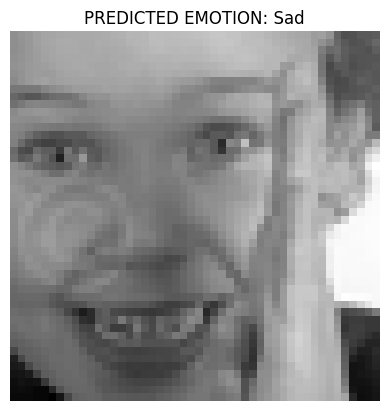

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

fer_csv_path = "fer2013.csv"
data = pd.read_csv(fer_csv_path)

emotion_mapping = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Sad',
    5: 'Surprise',
    6: 'Neutral'
}

pixels = data['pixels'].tolist()
labels = data['emotion'].tolist()

images = []
for pixel in pixels:
    try:
        image = np.fromstring(pixel, dtype=np.uint8, sep=' ').reshape(48, 48, 1)
        images.append(image)
    except ValueError:
        pass

images = np.array(images) / 255.0
labels = to_categorical(labels, num_classes=7)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=64, epochs=2, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

def display_emotion(index):
    image = X_test[index].reshape(48, 48)
    predicted_emotion = emotion_mapping[np.argmax(model.predict(X_test[index:index+1]))]
    plt.imshow(image, cmap='gray')
    plt.title(f"PREDICTED EMOTION: {predicted_emotion}")
    plt.axis('off')
    plt.show()
display_emotion(0)

225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step


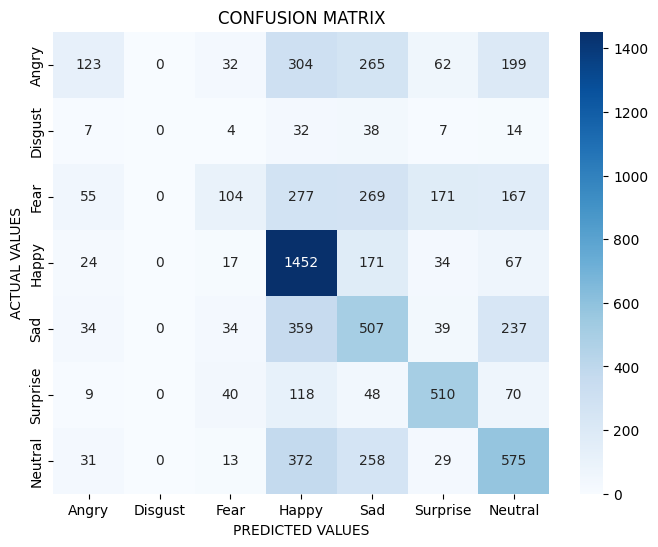

              precision    recall  f1-score   support

       Angry       0.43      0.12      0.19       985
     Disgust       0.00      0.00      0.00       102
        Fear       0.43      0.10      0.16      1043
       Happy       0.50      0.82      0.62      1765
         Sad       0.33      0.42      0.37      1210
    Surprise       0.60      0.64      0.62       795
     Neutral       0.43      0.45      0.44      1278

    accuracy                           0.46      7178
   macro avg       0.39      0.37      0.34      7178
weighted avg       0.44      0.46      0.41      7178

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


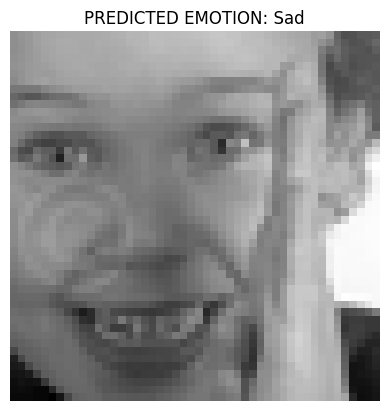

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred_classes), annot=True, fmt='d', cmap='Blues',
            xticklabels=emotion_mapping.values(), yticklabels=emotion_mapping.values())
plt.title('CONFUSION MATRIX')
plt.xlabel('PREDICTED VALUES')
plt.ylabel('ACTUAL VALUES')
plt.show()

print(classification_report(y_true, y_pred_classes, target_names=emotion_mapping.values()))

def display_emotion(index):
    image = X_test[index].reshape(48, 48)
    predicted_emotion = emotion_mapping[np.argmax(model.predict(X_test[index:index+1]))]
    plt.imshow(image, cmap='gray')
    plt.title(f"PREDICTED EMOTION: {predicted_emotion}")
    plt.axis('off')
    plt.show()

display_emotion(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


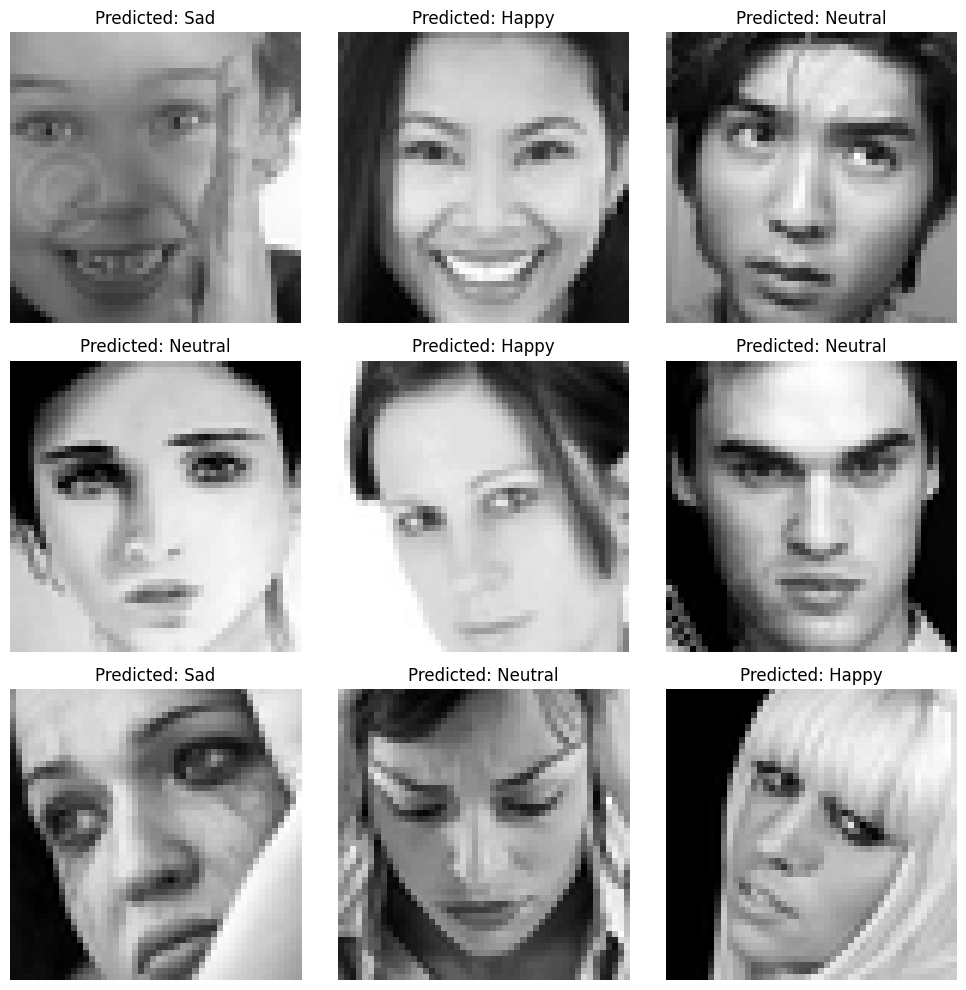

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i, ax in enumerate(axes):
    image = X_test[i].reshape(48, 48)
    predicted_emotion = emotion_mapping[np.argmax(model.predict(X_test[i:i + 1]))]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"PREDICTED EMOTION: {predicted_emotion}")
    ax.axis('off')

plt.tight_layout()
plt.show()

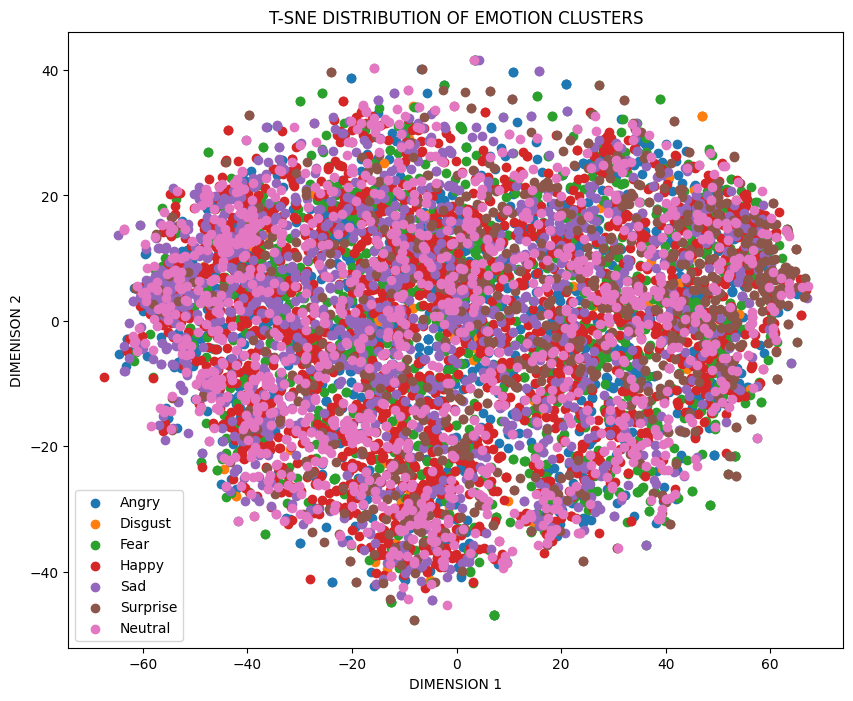

In [4]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test.reshape(X_test.shape[0], -1))

plt.figure(figsize=(10, 8))
for i in range(7):
    plt.scatter(X_tsne[y_test[:, i] == 1, 0], X_tsne[y_test[:, i] == 1, 1], label=emotion_mapping[i])
plt.title("T-SNE DISTRIBUTION OF EMOTION CLUSTERS")
plt.xlabel("DIMENSION 1")
plt.ylabel("DIMENISON 2")
plt.legend()
plt.show()

In [5]:
import librosa
import soundfile as sf
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
import os

def extract_features(audio_file):

    try:
        audio, sample_rate = librosa.load(audio_file, sr=None)
        pitches, magnitudes = librosa.piptrack(y=audio, sr=sample_rate)
        mean_pitch = np.mean(pitches[magnitudes > np.mean(magnitudes)])
        rms_energy = np.mean(librosa.feature.rms(y=audio).T, axis=0)[0]
        zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=audio).T, axis=0)[0]

        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
        mfccs_mean = np.mean(mfccs.T, axis=0)

        return np.concatenate([[mean_pitch, rms_energy, zero_crossing_rate], mfccs_mean])
    except (LibsndfileError, FileNotFoundError, RuntimeError) as e:
        print(f"Error processing file {audio_file}: {e}")
        return None

audio_files = []
fatigue_labels = []

audio_data_dir = '/content/drive/MyDrive/wav'

for file in os.listdir(audio_data_dir):
    if file.endswith('.wav'):
        file_path = os.path.join(audio_data_dir, file)

        audio_files.append(file_path)
        fatigue_labels.append(1)

features = [extract_features(file) for file in audio_files]
features = np.array([f for f in features if f is not None])
fatigue_labels = fatigue_labels[:len(features)]
scaler = StandardScaler()
features = scaler.fit_transform(features)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in kf.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = np.array(fatigue_labels)[train_index], np.array(fatigue_labels)[test_index]
    model = Sequential([
        Dense(128, activation='relu', input_shape=(features.shape[1],)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=0)

    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)

print(f"Average accuracy across folds: {np.mean(accuracies):.4f}")
pitch_threshold = 180
energy_threshold = 0.05
speaking_rate_threshold = 0.1

def predict_fatigue(file_path):
    features = extract_features(file_path)
    if features is None:
        return None
    features = scaler.transform(features.reshape(1, -1))
    features = features.flatten()
    mean_pitch, rms_energy, zero_crossing_rate, *_ = features

    is_fatigued = (mean_pitch < pitch_threshold and
                   rms_energy < energy_threshold and
                   zero_crossing_rate < speaking_rate_threshold)

    return is_fatigued

audio_data_dir = '/content/drive/MyDrive/wav'
fatigue_count = 0
non_fatigue_count = 0

for file in os.listdir(audio_data_dir):
    if file.endswith('.wav'):
        file_path = os.path.join(audio_data_dir, file)
        prediction = predict_fatigue(file_path)

        if prediction is not None:
            if prediction:
                fatigue_count += 1
                print(f"THE AUDIO FILE {file_path} INDICATES FATIGUE")
            else:
                non_fatigue_count += 1
                print(f"THE AUDIO FILE {file_path} DOES NOT INDICATE FATIGUE")
        else:
            print(f"Error predicting fatigue for file {file_path}")

print(f"TOTAL FILES: {fatigue_count + non_fatigue_count}")
print(f"FILES INDICATING FATIGUE: {fatigue_count}")
print(f"FILES NOT INDICATING FATIGUE: {non_fatigue_count}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Average accuracy across folds: 1.0000
THE AUDIO FILE /content/drive/MyDrive/wav/03a02Wb.wav DOES NOT INDICATE FATIGUE
THE AUDIO FILE /content/drive/MyDrive/wav/03a01Fa.wav INDICATES FATIGUE
THE AUDIO FILE /content/drive/MyDrive/wav/03a02Nc.wav DOES NOT INDICATE FATIGUE
THE AUDIO FILE /content/drive/MyDrive/wav/03a02Ta.wav DOES NOT INDICATE FATIGUE
THE AUDIO FILE /content/drive/MyDrive/wav/03a02Fc.wav INDICATES FATIGUE
THE AUDIO FILE /content/drive/MyDrive/wav/03a04Ad.wav DOES NOT INDICATE FATIGUE
THE AUDIO FILE /content/drive/MyDrive/wav/03a02Wc.wav DOES NOT INDICATE FATIGUE
THE AUDIO FILE /content/drive/MyDrive/wav/03a01Wa.wav DOES NOT INDICATE FATIGUE
THE AUDIO FILE /content/drive/MyDrive/wav/03a01Nc.wav INDICATES FATIGUE
THE AUDIO FILE /content/drive/MyDrive/wav/03a07La.wav DOES NOT INDICATE FATIGUE
THE AUDIO FILE /content/drive/MyDrive/wav/03b01Fa.wav DOES NOT INDICATE FATIGUE
THE AUDIO FILE /content/drive/MyDrive/wav/03a05Wa.wav DOES NOT INDICATE FATIGUE
THE AUDIO FILE /content/dr

In [7]:
!pip install plotly

import plotly.express as px
import plotly.graph_objects as go
from sklearn.manifold import TSNE
import pandas as pd

tsne = TSNE(n_components=2, random_state=42)
features_2d = tsne.fit_transform(features)
df = pd.DataFrame({'FIRST DIMENSION': features_2d[:, 0],
                   'SECOND DIMENSION': features_2d[:, 1],
                   'FATIGUE': fatigue_labels,
                   'AUDIO FILE': audio_files})

fig = px.scatter(df, x='FIRST DIMENSION', y='SECOND DIMENSION', color='FATIGUE',
                 hover_data=['AUDIO FILE'],
                 color_discrete_map={0: 'blue', 1: 'red'},
                 title='DETECTION OF COMMUNICATION FATIGUE THROUGH AUDIO CAPTURES DURING VIRTUAL COMMUNICATIONS')
fig.update_layout(
    title_font=dict(size=20),
    xaxis_title_font=dict(size=16),
    yaxis_title_font=dict(size=16),
    legend_font=dict(size=14),
    hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial")
)

fig.add_trace(go.Histogram2dContour(
    x=df['FIRST DIMENSION'],
    y=df['SECOND DIMENSION'],
    colorscale='Blues',
    contours=dict(showlabels=True, labelfont=dict(size=10)),
    hoverinfo='skip',
    showscale=False
))

fig.show()

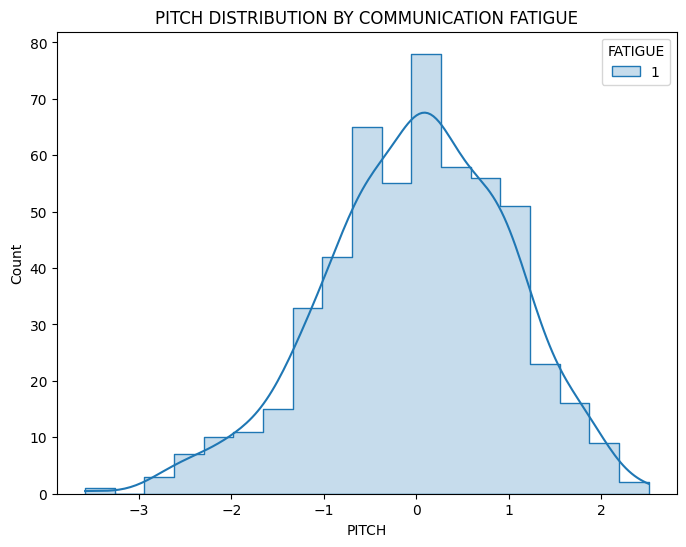

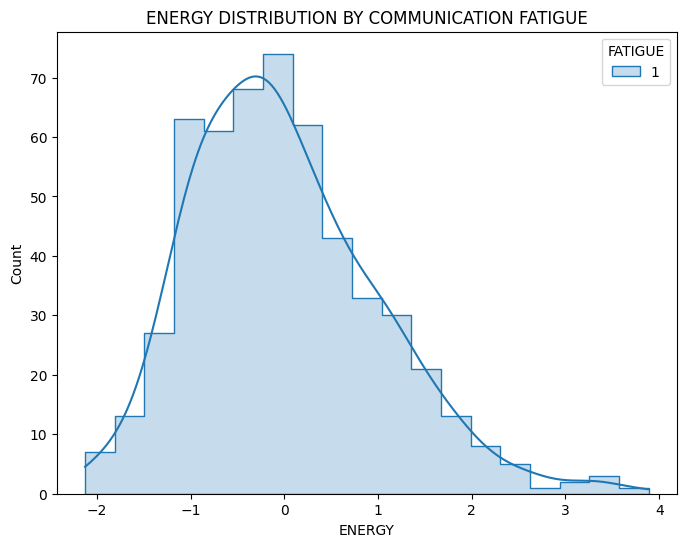

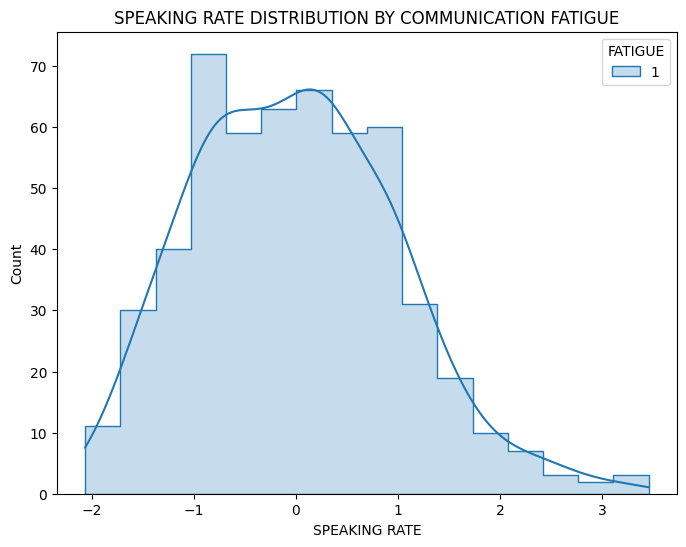

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame({'PITCH': features[:, 0],
                   'ENERGY': features[:, 1],
                   'SPEAKING RATE': features[:, 2],
                   'FATIGUE': fatigue_labels})

for feature in ['PITCH', 'ENERGY', 'SPEAKING RATE']:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='FATIGUE', element='step', kde=True)
    plt.title(f'{feature} DISTRIBUTION BY COMMUNICATION FATIGUE')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [13]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({'PITCH': features[:, 0],
                   'ENERGY': features[:, 1],
                   'SPEAKING RATE': features[:, 2],
                   'FATIGUE': fatigue_labels,
                   'AUDIO FILE': audio_files})

fig = px.parallel_coordinates(df, color="FATIGUE",
                              dimensions=['PITCH', 'ENERGY', 'SPEAKING RATE'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              title="FATIGUE DETECTION FOR EVERY AUDIO COMUNICATION")
fig.show()

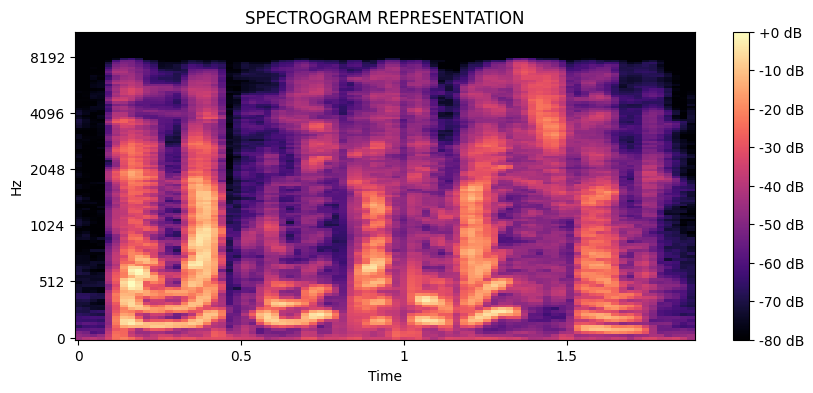

In [46]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

audio_data_dir = "/content/drive/MyDrive/wav"
audio_file = "/content/drive/MyDrive/wav/03a01Fa.wav"
file_path = os.path.join(audio_data_dir, audio_file)
audio_data, sr = librosa.load(file_path)

spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr)

plt.figure(figsize=(10, 4))
librosa.display.specshow(
    librosa.power_to_db(spectrogram, ref=np.max),
    sr=sr,
    x_axis="time",
    y_axis="mel",
)
plt.colorbar(format="%+2.0f dB")
plt.title(f"SPECTROGRAM REPRESENTATION")
plt.show()